In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

In [2]:
df=pd.read_csv('mgb_aud_tweets_july2020.csv')
df.head()

,Time,Id,Tweets
0,2020-07-29 20:10:45+00:00,1288466505592647680,Jesus. Justice for Israel Jackson.
1,2020-07-28 18:32:24+00:00,1138260140245696512,As of last weekend I finished a month internsh...
2,2020-07-29 21:08:14+00:00,890886953037647872,All about *papistan
3,2020-07-26 00:16:37+00:00,1071352236083736578,: Purell? Never heard of her.
4,2020-07-28 18:28:59+00:00,17622490,NaN


In [3]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = df["Tweets"].size   #df
clean_description_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_description_lemmization.append(fix_Text2(df["Tweets"][i])) #clean_

clean_description_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     U31\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     U31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['jesus justice israel jackson',
 'last weekend finished month internship ccof certified farm blast',
 'papistan',
 'purell never heard',
 'nan']

In [4]:
len(clean_description_lemmization)

687

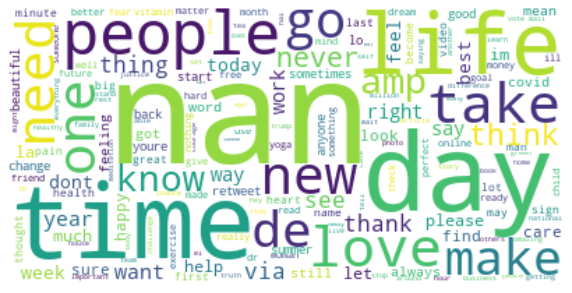

In [5]:
# word cloud
text_wc = " ".join(item for item in clean_description_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_description_lemmization)
tv_transform.shape

(687, 2550)

## determining best number of clusters

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

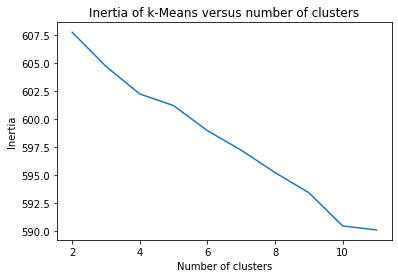

In [7]:
from sklearn.cluster import KMeans
scores = [KMeans(n_clusters=i+2).fit(tv_transform).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

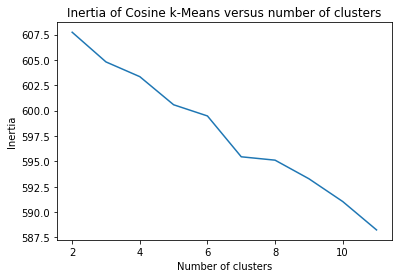

In [8]:
#high dimension data
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(tv_transform)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

## audience clustering

In [9]:
from scipy.cluster.vq import kmeans,vq

In [10]:
num_clusters=8  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

## unigram

In [11]:
tv=TfidfVectorizer(max_features=100, min_df=3)  # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_description_lemmization)

In [12]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:4])

['always', 'amp', 'anyone', 'back']
['easy', 'know', 'think', 'ever']
['th', 'thing', 'mean', 'year']
['via', 'year', 'th', 'back']
['always', 'amp', 'anyone', 'back']
['lot', 'start', 'say', 'amp']
['sure', 'yoga', 'care', 'work']
['yoga', 'get', 'feel', 'dont']


## bigram

In [13]:
tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [14]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:4])

['able tell', 'always joy', 'anyone josie', 'bad diet']
['de estar', 'joint pain', 'sometimes job', 'donald trump']
['self portrait', 'something new', 'minute request', 'winning one']
['take care', 'winning one', 'self portrait', 'bad diet']
['able tell', 'always joy', 'anyone josie', 'bad diet']
['made feel', 'retweet chance', 'quote day', 'always joy']
['seems like', 'would like', 'chance winning', 'wave here']
['would like', 'giveaway retweet', 'easy safe', 'day ago']


## unigram & bigram

In [15]:
tv=TfidfVectorizer(max_features=100,ngram_range=(1,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [16]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:7])

['always', 'amp', 'anyone', 'back', 'beautiful', 'best', 'better']
['easy', 'know', 'think', 'ever', 'mind', 'covid', 'got']
['take', 'thing', 'may', 'would', 'right', 'mail', 'one']
['use', 'would', 'take', 'back', 'better', 'sign', 'thought']
['always', 'amp', 'anyone', 'back', 'beautiful', 'best', 'better']
['lot', 'sometimes', 'say', 'amp', 'right', 'use', 'always']
['summer', 'year', 'care', 'word', 'start', 'always', 'amp']
['year', 'go', 'fear', 'dont', 'see', 'back', 'start']


## inspect importance

In [17]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [18]:
tv_sum.sort_values(ascending=False).head(20)

nan       60.552758
day       15.016196
people    14.443634
love      14.338865
time      14.198141
life      13.525328
like      12.639644
get       12.116725
one       11.662714
via       10.704655
amp       10.469851
need      10.314830
new       10.184404
see       10.051731
go         9.916771
know       9.654593
never      9.642406
best       9.534178
de         9.355029
think      9.251144
dtype: float64

In [19]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

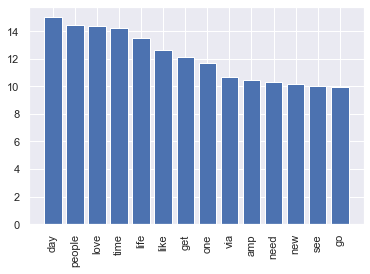

In [20]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.show()

## feature importance by cluster

In [21]:
tv_transform.todense().shape

(687, 100)

In [22]:
clust1=pd.DataFrame(zip(terms,list(cluster_centers[1]))).sort_values(by=1,ascending=False)

In [23]:
clust1

,0,1
16,easy,0.009983
38,know,0.008237
83,think,0.008215
17,ever,0.008175
53,mind,0.007275
...,...,...
34,heart,0.000000
33,health,0.000000
32,hard,0.000000
31,happy,0.000000


In [24]:
clust1.iloc[:, 0]

16      easy
38      know
83     think
17      ever
53      mind
       ...  
34     heart
33    health
32      hard
31     happy
99     youre
Name: 0, Length: 100, dtype: object

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
tv_sum.index

Index(['always', 'amp', 'anyone', 'back', 'beautiful', 'best', 'better', 'big',
       'care', 'change', 'check', 'covid', 'day', 'de', 'dont', 'dream',
       'easy', 'ever', 'exercise', 'fear', 'feel', 'feeling', 'find', 'first',
       'free', 'get', 'go', 'goal', 'good', 'got', 'great', 'happy', 'hard',
       'health', 'heart', 'help', 'im', 'important', 'know', 'la', 'last',
       'let', 'life', 'like', 'look', 'lot', 'love', 'made', 'mail', 'make',
       'man', 'may', 'mean', 'mind', 'minute', 'money', 'much', 'name', 'nan',
       'need', 'never', 'new', 'nothing', 'one', 'online', 'pain', 'people',
       'please', 'retweet', 'right', 'safe', 'say', 'see', 'sign', 'someone',
       'sometimes', 'start', 'still', 'summer', 'sure', 'take', 'thank',
       'thing', 'think', 'thought', 'time', 'today', 'use', 'via', 'video',
       'vitamin', 'vote', 'want', 'way', 'week', 'word', 'work', 'would',
       'year', 'youre'],
      dtype='object')

In [27]:
#left = 

#In [43]: right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
   #....:                       'key2': ['K0', 'K0', 'K0', 'K0'],
   #....:                       'C': ['C0', 'C1', 'C2', 'C3'],
   #....:                       'D': ['D0', 'D1', 'D2', 'D3']})
   #....: 

#In [44]: result = pd.merge(left, right, on=['key1', 'key2'])

In [28]:
for col in clust1.columns: 
    print(col) 

0
1


In [29]:
for col in tv_sum.columns: 
    print(col) 

importance


In [30]:
tv_sum

always        5.455646
amp          10.469851
anyone        4.866557
back          5.556791
beautiful     5.556171
               ...    
word          5.935127
work          6.886877
would         4.574754
year          8.141195
youre         4.661621
Length: 100, dtype: float64

In [31]:
for col in tv_sum.columns: 
    print(col) 

importance


In [32]:
merged = pd.merge(clust1, tv_sum, right_index=True, left_on='0')

ValueError: Cannot merge a Series without a name